# ¡Hola Jafet!

Mi nombre es Ezequiel Ferrario, soy code reviewer en Tripleten y tengo el agrado de revisar el proyecto que entregaste.

Para simular la dinámica de un ambiente de trabajo, si veo algún error, en primer instancia solo los señalaré, dándote la oportunidad de encontrarlos y corregirlos por tu cuenta. En un trabajo real, el líder de tu equipo hará una dinámica similar. En caso de que no puedas resolver la tarea, te daré una información más precisa en la próxima revisión.

Encontrarás mis comentarios más abajo - **por favor, no los muevas, no los modifiques ni los borres**.

¿Cómo lo voy a hacer? Voy a leer detenidamente cada una de las implementaciones que has llevado a cabo para cumplir con lo solicitado. Verás los comentarios de esta forma:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si todo está perfecto.
</div>


<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta. Se aceptan uno o dos comentarios de este tipo en el borrador, pero si hay más, deberá hacer las correcciones. Es como una tarea de prueba al solicitar un trabajo: muchos pequeños errores pueden hacer que un candidato sea rechazado.
</div>

<div class="alert alert-block alert-danger">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>

Hola, muchas gracias por tus comentarios y la revisión.        
</div>

¡Empecemos!

--------

<div class="alert alert-block alert-danger">

<b>Comentario general #1</b> <a class="tocSkip"></a>

Jafet, hiciste un muy buen trabajo a lo largo del proyecto.

Entendiste como hacer la exploracion inicial y la seccion de graficos es excelente.

Luego, faltaria replantear las prueba estadistica.

Quedo atento a tu correccion, saludos.

</div>

--------

<div class="alert alert-block alert-success">

<b>Comentario general #2</b> <a class="tocSkip"></a>

Jafet, corregiste todos los puntos marcados de este trabajo.
    
 Es por ello que finalizas un excelente trabajo, me gusto mucho ver el manejo de las pruebas estadisticas con Levene y la prueba T.
    
 Por lo expuesto, este trabajo pasa a estar **aprobado**.
    
  Exitos en lo que viene, saludos.
</div>

-------

# Descripcion del proyecto
Zuber, una nueva empresa de viajes compartidos que se está lanzando en Chicago. Tu tarea es encontrar patrones en la información disponible. Quieres comprender las preferencias de los pasajeros y el impacto de los factores externos en los viajes.

Al trabajar con una base de datos, analizarás los datos de los competidores y probarás una hipótesis sobre el impacto del clima en la frecuencia de los viajes.

Descripción de los datos
Una base de datos con información sobre viajes en taxi en Chicago:

tabla neighborhoods: datos sobre los barrios de la ciudad

name: nombre del barrio
neighborhood_id: código del barrio
tabla cabs: datos sobre los taxis

cab_id: código del vehículo
vehicle_id: ID técnico del vehículo
company_name: la empresa propietaria del vehículo
tabla trips: datos sobre los viajes

trip_id: código del viaje
cab_id: código del vehículo que opera el viaje
start_ts: fecha y hora del inicio del viaje (tiempo redondeado a la hora)
end_ts: fecha y hora de finalización del viaje (tiempo redondeado a la hora)
duration_seconds: duración del viaje en segundos
distance_miles: distancia del viaje en millas
pickup_location_id: código del barrio de recogida
dropoff_location_id: código del barrio de finalización
tabla weather_records: datos sobre el clima

record_id: código del registro meteorológico
ts: fecha y hora del registro (tiempo redondeado a la hora)
temperature: temperatura cuando se tomó el registro
description: breve descripción de las condiciones meteorológicas, por ejemplo, "lluvia ligera" o "nubes dispersas"

# Tabla de Contenido

1. [Inicialización](#Inicialización)
2. [Preparar los datos](#Preparar-los-datos)
3. [Informacion general DataFrame](#Informacion-general)
4. [identificar los 10 principales barrios en términos de finalización del recorrido](#Identificar-top-10)
    1. [Filtar las 20 principales compañias](#Filtrar-las-20-principales-compañias)
    2. [Filtrar las 30 principales compañias.](#Filtrar-las-30-principales-compañias)
5. [Bloxplot de los viajes por empresa de taxi](#Bloxplot-de-los-viajes-por-empresa-de-taxi)
6. [Histograma de los promedios de viajes por barrio](#Histograma-de-los-promedios-de-viajes-por-barrio)
7. [Prueba de hipótesis](#Prueba-de-hipotesis)
    1. [La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos](#La-duracion-promedio-de-los-viajes-desde-el-Loop-hasta-el-Aeropuerto-Internacional-O'hare-cambia-los-sabados-lluviosos)
8. [Conclusión general](#Conclusión-general)

## Inicializacion
Abre el archivo de datos y estudia la información general

In [63]:
# Cargar todas las librerías
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats 

In [64]:
# Carga el  archivos de datos del DataFrame
df_taxi_trips_company = pd.read_csv('/datasets/project_sql_result_01.csv', sep=',', header=0)
df_chicago_dropoff_avg_trips = pd.read_csv('/datasets/project_sql_result_04.csv', sep=',', header=0)
df_loop_to_ohare_trips_weather_duration = pd.read_csv('/datasets/project_sql_result_07.csv', sep=',', header=0)

<div class="alert alert-block alert-danger">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

En este caso no estas llamando bien a los directorios por lo que existe un error, a continuacion te dejo los correctos:

```
"/datasets/project_sql_result_01.csv"
"/datasets/project_sql_result_04.csv"
"/datasets/project_sql_result_07.csv"

```

</div>

<div class="alert alert-block alert-success">

<b>Comentario del revisor #2</b> <a class="tocSkip"></a>

Corregido, muy bien.

</div>

## Preparar datos

## Informacion general DataFrame

In [65]:
## Imprime la información general/resumida sobre el DataFrame df_taxi_trips_company
def first_lookup(datos):
    print('Primera filas:')
    print(datos.head())
    print()
    print('Informacion:')
    print(datos.info())
    print()
    print('El total de valores ausentes es:')
    print(datos.isna().sum())
    print()
    print('El total de valores duplicados es:')
    print(datos.duplicated().sum())
print(first_lookup(df_taxi_trips_company))

Primera filas:
                      company_name  trips_amount
0                        Flash Cab         19558
1        Taxi Affiliation Services         11422
2                Medallion Leasing         10367
3                       Yellow Cab          9888
4  Taxi Affiliation Service Yellow          9299

Informacion:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
None

El total de valores ausentes es:
company_name    0
trips_amount    0
dtype: int64

El total de valores duplicados es:
0
None


La informacion resumida del DataFrame donde las columnas principales nombre de la compañia y cantidad de viajes, los tipos de datos que nos arrojan son correctos no hay que hacer ninguna modificacion, no hay presencia de valores duplicados, ni hay presencia de valores ausentes.

In [66]:
# Imprime la información general/resumida sobre el DataFrame df_chicago_dropoff_avg_trips
def first_lookup(datos):
    print('Primera filas:')
    print(datos.head())
    print()
    print('Informacion:')
    print(datos.info())
    print()
    print('El total de valores ausentes es:')
    print(datos.isna().sum())
    print()
    print('El total de valores duplicados es:')
    print(datos.duplicated().sum())
print(first_lookup(df_chicago_dropoff_avg_trips))

Primera filas:
  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000

Informacion:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB
None

El total de valores ausentes es:
dropoff_location_name    0
average_trips            0
dtype: int64

El total de valores duplicados es:
0
None


df_chicago_dropoff_avg_trips el DataFrame nos devuelve una informacion resumida que nos indica las primeras 5 filas, donde la columnas importantes a resaltar son el promedio de viajes y el lugar de descenso del viaje, no se presentan valores duplicadosm ni hay valores ausentes, los tipos de datos de las columnas se encuentran correctos no hay que hacer ninguna modificacion

<div class="alert alert-block alert-danger">

<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
La exploracion es excelente.
    
Deja una descripcion de lo observado en ambos dataset en cuanto a como se compone, si hay errores o no  (nulos, duplicados, etc) y que informacion nos provee. Este punto es muy importante porque resumiremos con un analisis en **markdown** sobre como esta compuesto el dataset y sus variables mas importante. </div>

<div class="alert alert-block alert-success">

<b>Comentario del revisor #2</b> <a class="tocSkip"></a>

Corregido, buenas observaciones.

</div>

## Identificar  los 10 principales  barrios en terminos de finalizacion de recorrido

In [67]:
top_10_dropoff_locations = df_chicago_dropoff_avg_trips.sort_values(by='average_trips', ascending=False).head(10)
print(top_10_dropoff_locations[['dropoff_location_name', 'average_trips']])

  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             Lake View    2420.966667
6            Grant Park    2068.533333
7         Museum Campus    1510.000000
8            Gold Coast    1364.233333
9    Sheffield & DePaul    1259.766667


Se enlistan los lugares de descenso del viaje de mayor a menor en cuanto al promedio de viajes

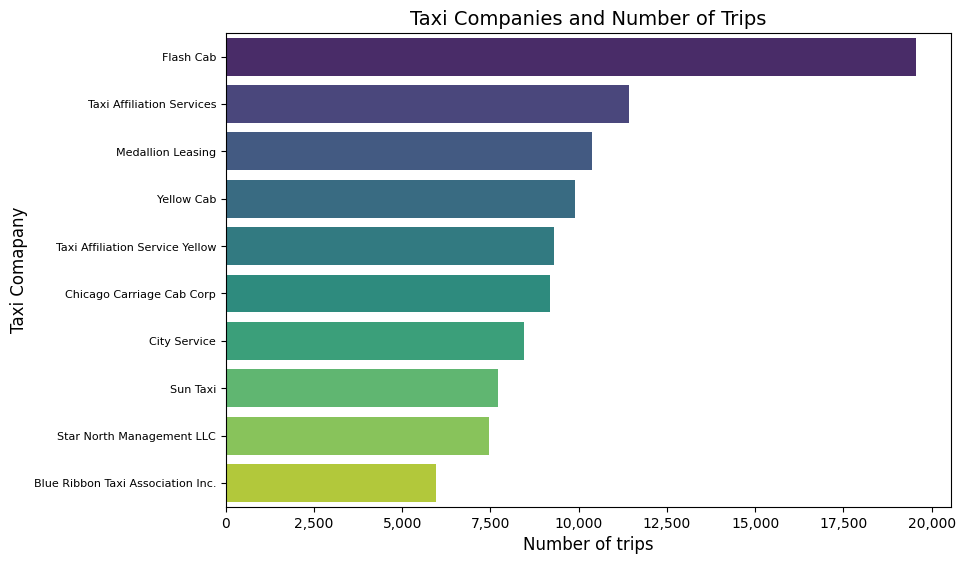

In [68]:
# Filtrar las 10 empresas principales
top_10_companies = df_taxi_trips_company.nlargest(10, 'trips_amount')

# Graficar
plt.figure(figsize=(10, 6))
sns.barplot(x='trips_amount', y='company_name', data=top_10_companies, palette='viridis')

# Títulos y etiquetas
plt.title('Taxi Companies and Number of Trips', fontsize=14)
plt.xlabel('Number of trips', fontsize=12)
plt.ylabel('Taxi Comapany', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=8)

# Separadores de miles
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))

# Diseño ajustado
plt.tight_layout(pad=2)
plt.show()

Las compañias de taxi y su numero de viajes donde se plasman las 10 mas solicitadas por los usuarios
a) Donde la empresa dominante "Flash Cab" con un aproximado de 20, 000 viajes superando a las demas indicando una fuerte demanda en el area
b) La empresa encabezando el segundo lugar "Taxi Affiliation Service" casi por debajo de la mitad que Flash Cab una diferencia notoria y diferencias similares con las otra compalias de taxi que estan por debajo de esta
c) Se debe explorar que factores impulsan el numero de viajes si se debe a la calidad de servicio o a la accesibilidad, la zona geografica donde operan estas compañias como aeropuestos o areas urbanizadas

###  Filtrar las 20 principales compañias


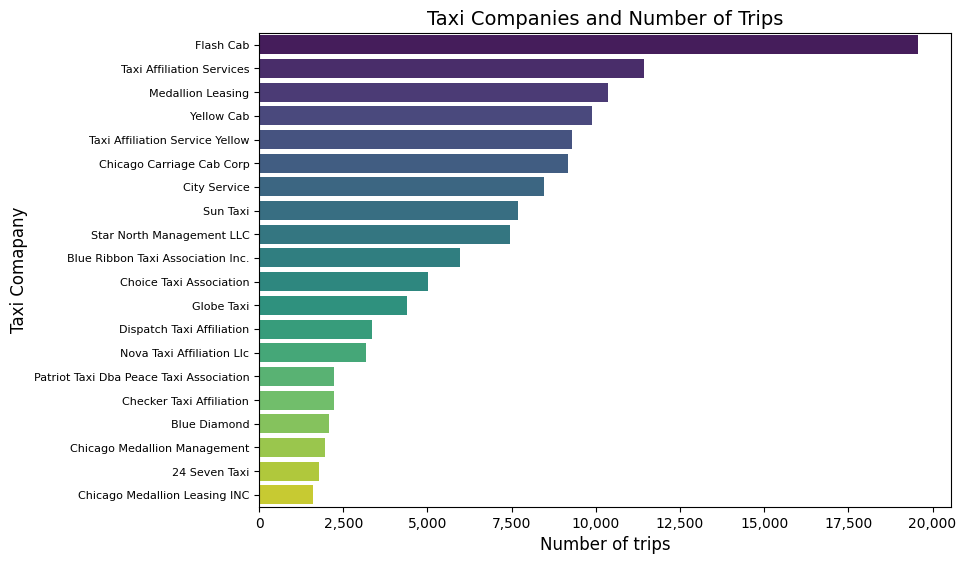

In [69]:
# Filtrar las 20 empresas principales
top_20_companies = df_taxi_trips_company.nlargest(20, 'trips_amount')

# Graficar
plt.figure(figsize=(10, 6))
sns.barplot(x='trips_amount', y='company_name', data=top_20_companies, palette='viridis')

# Títulos y etiquetas
plt.title('Taxi Companies and Number of Trips', fontsize=14)
plt.xlabel('Number of trips', fontsize=12)
plt.ylabel('Taxi Comapany', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=8)

# Separadores de miles
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))

# Diseño ajustado
plt.tight_layout(pad=2)
plt.show()

Compañia de taxis y el numero de sus viajes de las 20 mas solicitadas por los usuarios se nota un crecimiento exponencial 
a) Flash Cab donde se encuentra a la alza y una diferencia muy notiria entre su competidores se debera a algun cambio o siempre a liderado el area
b) Se puede notar que de as compañias de las 11-20 mas populares son llegan casi hasta los 5,000 viajes es una cantidad demasiado baja se debera a su calidad en servicio, accesibilidad, etc.


### Filtrar las 30 principales compañias

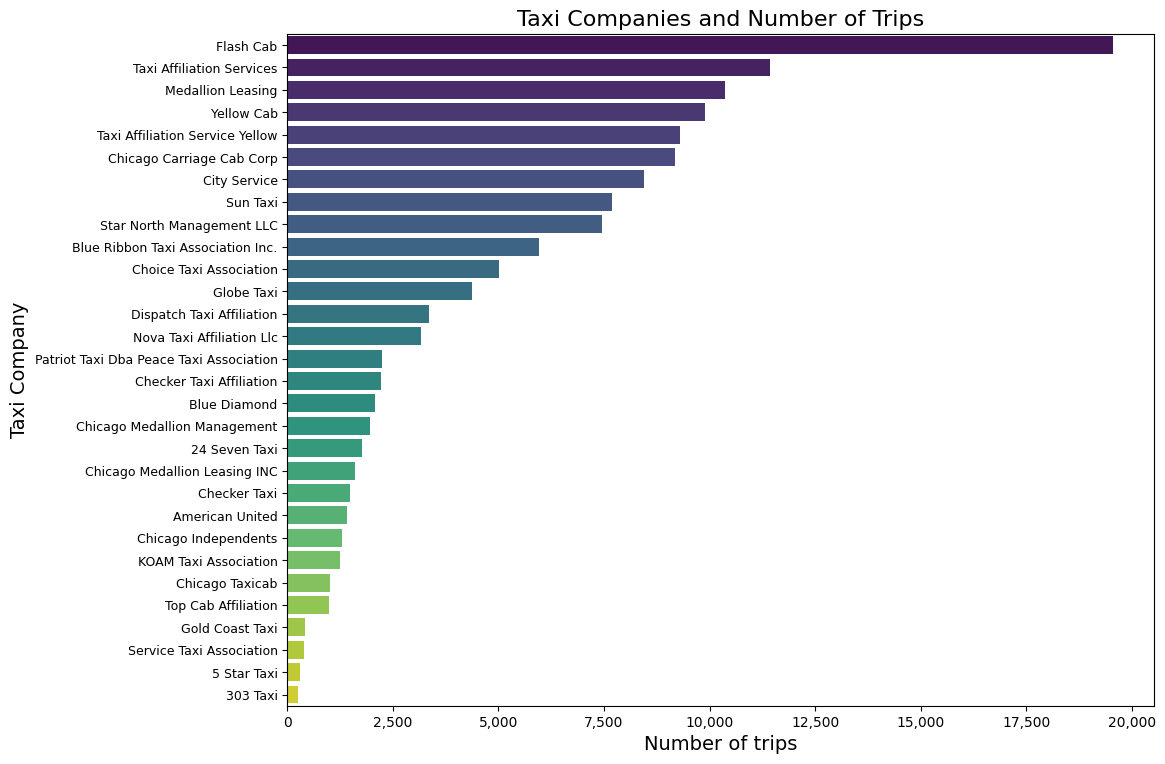

In [70]:
# Filtrar las 30 empresas principales
top_30_companies = df_taxi_trips_company.nlargest(30, 'trips_amount')

# Graficar
plt.figure(figsize=(12, 8))
sns.barplot(x='trips_amount', y='company_name', data=top_30_companies, palette='viridis')

# Títulos y etiquetas
plt.title('Taxi Companies and Number of Trips', fontsize=16)
plt.xlabel('Number of trips', fontsize=14)
plt.ylabel('Taxi Company', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=9)

# Separadores de miles en el eje X
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))

# Ajustar el diseño
plt.tight_layout(pad=2)
plt.show()

Las compañias de taxi y el numero de viajes
a) Las primeras 10 compañias de taxi mas solicitadas por los usuarios van desde los 7,500 hasta la diferencia notoria de 20,000 viajes
b) El top 20 de las compañias de taxi (11-20) de 2,500 - 7,500 un numero demasiado bajo se debera a la competencia entre compañias, accesibilidad, calidad del servicio, zona geografica
c) El top 30 de las compañias de taxi (21-30) hasta los 2,500 viajes podria ser que son compañias en vias de desarrollo que son nuevas en el mercado, la zona donde operan no es muy solicitada, calidad en el servicio
Se debe de hacer un analisis a fondo para ver las causas precisas.

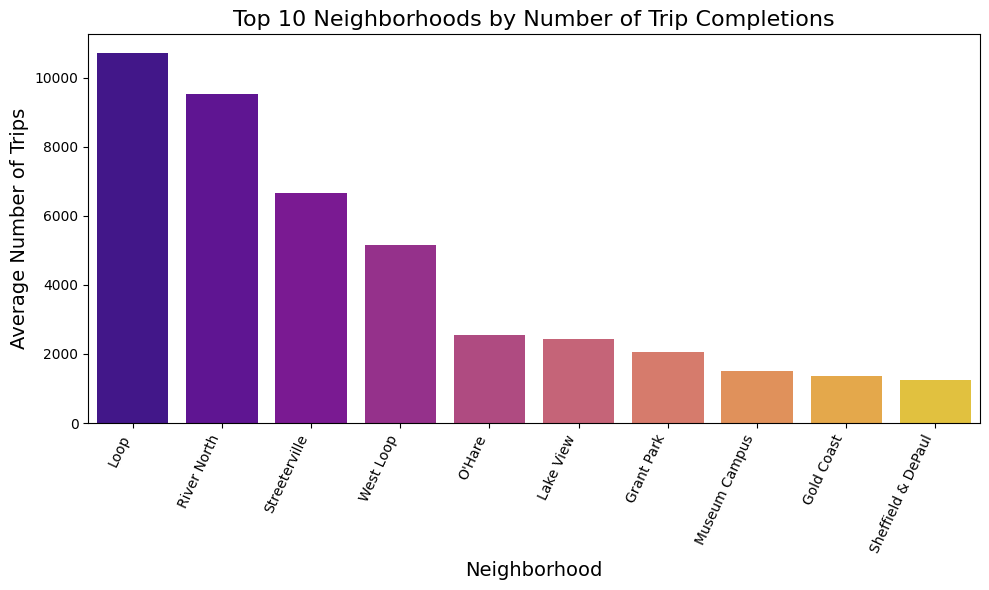

In [71]:
# Ordenar los datos y preparar el gráfico
top_10_dropoff_locations = df_chicago_dropoff_avg_trips.sort_values(by='average_trips', ascending=False).head(10)

# Crear el gráfico
plt.figure(figsize=(10, 6))
sns.barplot(x='dropoff_location_name', y='average_trips', data=top_10_dropoff_locations, palette='plasma')

# Títulos y etiquetas
plt.title('Top 10 Neighborhoods by Number of Trip Completions', fontsize=16)
plt.xlabel('Neighborhood', fontsize=14)
plt.ylabel('Average Number of Trips', fontsize=14)

# Ajustar etiquetas del eje X para que no se solapen
plt.xticks(rotation=65, ha='right', fontsize=10)

# Ajustar el diseño
plt.tight_layout()
plt.show()

Grafico de barra donde se muestran los 10 barrios principales por promedio de viajes completados 
a) Loop el barrio con el promedio mas alto de viajes completados superando los 10,000, donde le siguen River North, Streeterville con promedios entre 8,000-10,000, indicando que estos barrios son de los mas activos o populares de la ciudad debido al beneficio de su zona geografica
b) Hay una marcada diferencia entre los primeros 4 barios, despues de estos disminuye considerablemente, puede indicar que la demanda de taxis es concentrada en ciertas zonas


<div class="alert alert-block alert-success">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Excelente seccion.
    
  Muy buenos graficos y perfectas conclusiones.</div>

## Bloxplot de los viajes por empresa de taxi

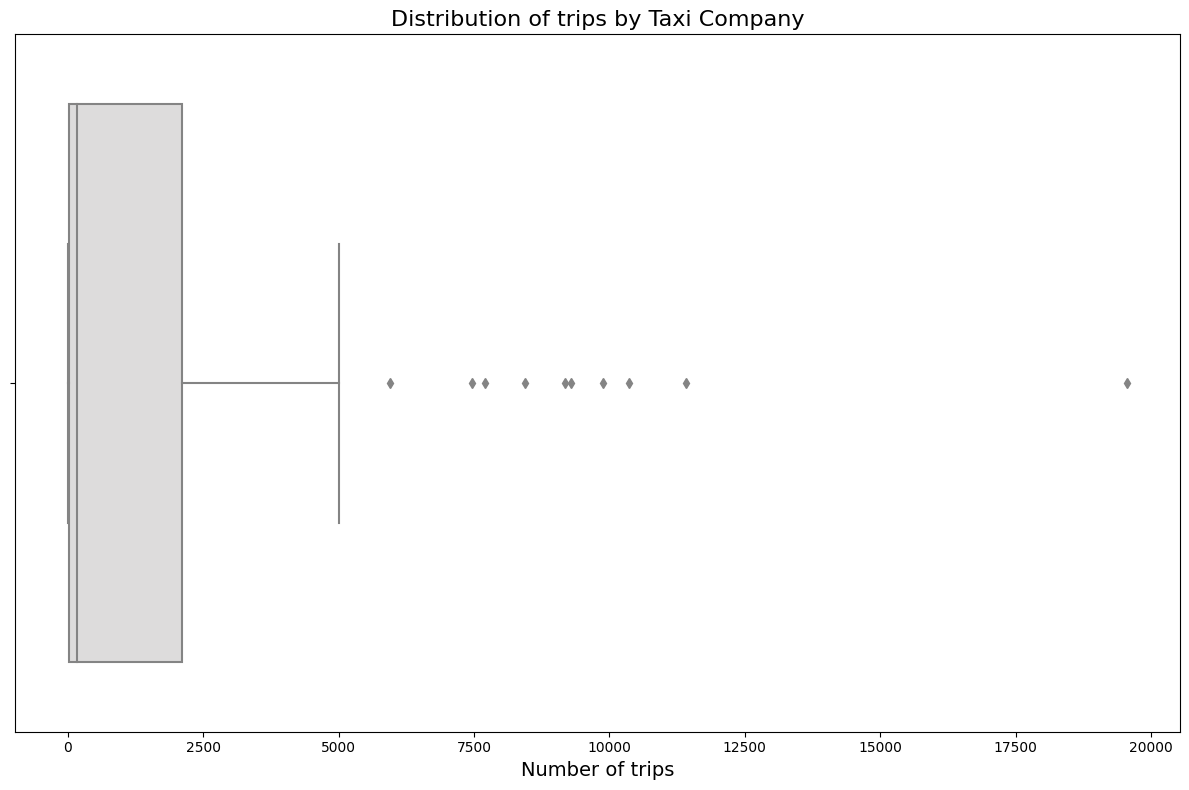

In [72]:
# Boxplot de los viajes por empresa de taxi
plt.figure(figsize=(12, 8))
sns.boxplot(x='trips_amount', data=df_taxi_trips_company, palette='coolwarm')
plt.title('Distribution of trips by Taxi Company', fontsize=16)
plt.xlabel('Number of trips', fontsize=14)
plt.tight_layout()
plt.show()

El diagrama box-plot marca la distribucion de viajes por compañia de taxis donde cada punto representa la cantidad de viajes que realizaron las compañias 
a) Distribucion de la mayorias de las compañias es relativamente bajo ( donde se puede observar que la mediana esta muy cerca del limite inferior, esto nos dice que estas compañias tienen un numero reducido de viajes en comparacion con sus outliers
b)Los outliers representas las compañias que realizaron viajes significativos superando al promedio( apartir de 7,500-20,000)
c) IQR el boxplot representa el 50% de los datos (Q1-Q3) indicando que la mayoria de las empresas el numero de sus viajes  esta concentrado en un rango mas bajo que los outliers


<div class="alert alert-block alert-success">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Perfecto, bien identificados los outliers.</div>

## Histograma de los promedios de viajes por barrio

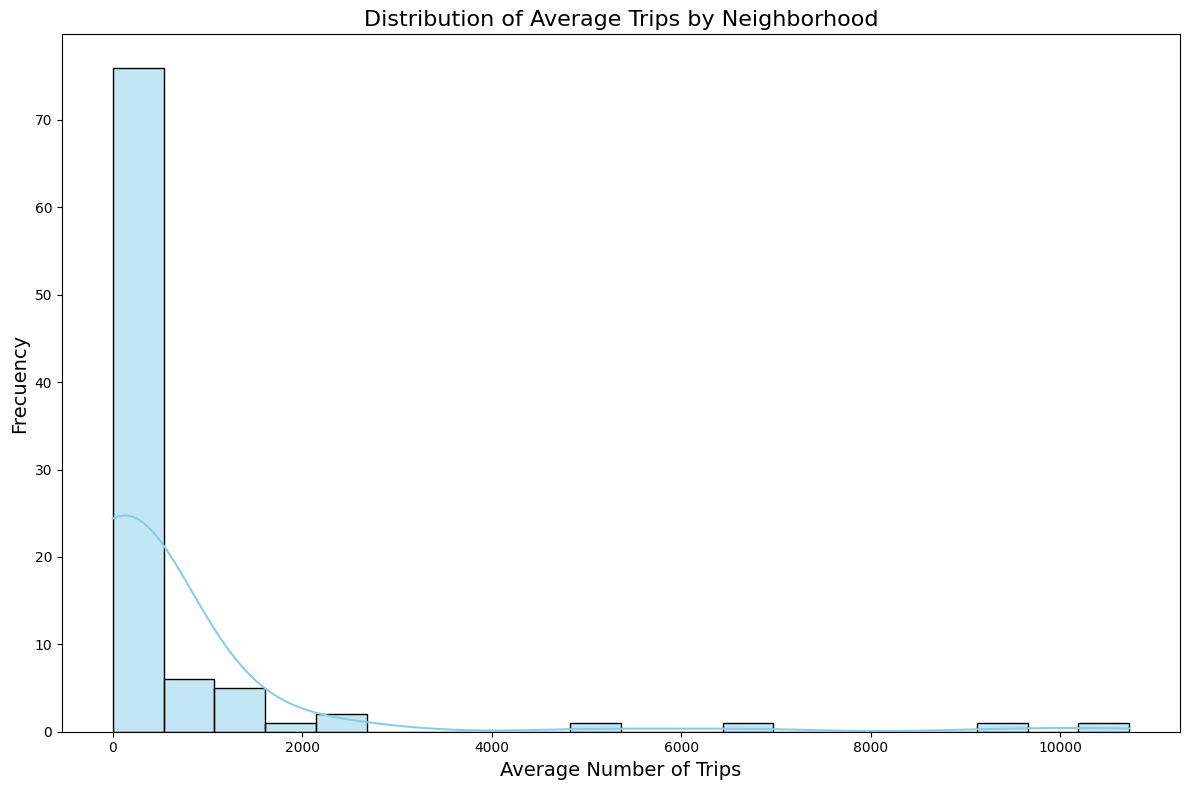

In [73]:
# Histograma de los promedios de viajes por barrio
plt.figure(figsize=(12, 8))
sns.histplot(df_chicago_dropoff_avg_trips['average_trips'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Average Trips by Neighborhood', fontsize=16)
plt.xlabel('Average Number of Trips', fontsize=14)
plt.ylabel('Frecuency', fontsize=14)
plt.tight_layout()
plt.show()

El histograma marca la distribucion promedio de viajes por barrio
a) La distribucion esta sesgada hacia la derecha la mayor parte de los barrios tienen un promedio bajo de 0 a 1,000 viajes
b) Existen pocos barrios con promedios altos de viajes mas de 4000 lo que crea un cola larga hacia la derecha 
c) Barrio promedio tipico dado que la mayoria de las frecuencias se encuentra en los valores mas bajos, se infiere que la mayoria de los barrios no reciben una gran cantidad de viajes en promedio
d) La presencia de barrios atipicos hay presencia de promedio de 10,000 viajes probablemente barrios populares, barrios comerciales, barrios de buen nivel socioeconomico, aeropuertos, etc.
d) Existe una granvariabilidad entre el promedio de los viajes indicando que ciertos barrios no reciben cierta demanda

<div class="alert alert-block alert-success">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

 Muy buen histograma.</div>

In [74]:
# Imprime la información general/resumida sobre el DataFrame df_loop_to_ohare_trips_weather_duration
def first_lookup(datos):
    print('Primera filas:')
    print(datos.head())
    print()
    print('Informacion:')
    print(datos.info())
    print()
    print('El total de valores ausentes es:')
    print(datos.isna().sum())
    print()
    print('El total de valores duplicados es:')
    print(datos.duplicated().sum())
print(first_lookup(df_loop_to_ohare_trips_weather_duration))

Primera filas:
              start_ts weather_conditions  duration_seconds
0  2017-11-25 16:00:00               Good            2410.0
1  2017-11-25 14:00:00               Good            1920.0
2  2017-11-25 12:00:00               Good            1543.0
3  2017-11-04 10:00:00               Good            2512.0
4  2017-11-11 07:00:00               Good            1440.0

Informacion:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB
None

El total de valores ausentes es:
start_ts              0
weather_conditions    0
duration_seconds      0
dtype: int64

El total de valores duplicados es:
197
None


In [75]:
df_loop_to_ohare_trips_weather_duration['start_ts'] = pd.to_datetime(df_loop_to_ohare_trips_weather_duration['start_ts'])
df_loop_to_ohare_trips_weather_duration['duration_seconds'] = df_loop_to_ohare_trips_weather_duration['duration_seconds'].astype(int)
print(df_loop_to_ohare_trips_weather_duration.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 25.2+ KB
None


Al DataFrame en cuestion si hay presencia de duplicados y tambien puede mejorar sus datos para un mejor tratamiento se cambio la columna: a datatime, la columna duration_seconds se cambio a tipo de dato int

In [76]:
df_loop_to_ohare_trips_weather_duration = df_loop_to_ohare_trips_weather_duration.drop_duplicates()
print(df_loop_to_ohare_trips_weather_duration.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 871 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            871 non-null    datetime64[ns]
 1   weather_conditions  871 non-null    object        
 2   duration_seconds    871 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 27.2+ KB
None


Se analizaron los valores duplicados se decidio por eliminarlo ya que alterarian nuestro analisis provocando resultados erroneos.

<div class="alert alert-block alert-danger">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Deja una descripcion de lo observado en este dataset en cuanto a como se compone, si hay errores o no  (nulos, duplicados, etc) y que informacion nos provee. Este punto es muy importante porque resumiremos con un analisis en **markdown** sobre como esta compuesto el dataset y sus variables mas importante. </div>

<div class="alert alert-block alert-success">

<b>Comentario del revisor #2</b> <a class="tocSkip"></a>

Corregido.

</div>

## Prueba de hipotesis

### La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos

HO: La duración promedio de los viajes en días con mal clima (lluviosos) es igual a la duración promedio de los viajes en días con buen clima H1:  La duracion promedio de los viajes en dias con mal clima (lluviosos) es diferente de la duracion promedio de los viajes en dias con buen clima.

In [78]:
from scipy.stats import ttest_ind, levene
# Filtramos los sábados
df_loop_to_ohare_trips_weather_duration['day_of_week'] = df_loop_to_ohare_trips_weather_duration['start_ts'].dt.dayofweek
saturdays_data = df_loop_to_ohare_trips_weather_duration[df_loop_to_ohare_trips_weather_duration['day_of_week'] == 5]
# Clasificamos las condiciones meteorologicas en Bad y Good
saturdays_data['weather_category'] = saturdays_data['weather_conditions'].apply(lambda x: 'Bad' if x == 'Bad' else 'Good')
# Separamos los datos en dos grupos
bad_weather_durations = saturdays_data[saturdays_data['weather_category'] == 'Bad']['duration_seconds']
good_weather_durations = saturdays_data[saturdays_data['weather_category'] == 'Good']['duration_seconds']

#Prueba de Levene para verificar la igualdad de varianzas
levene_stat, levene_p_value = levene(bad_weather_durations, good_weather_durations)
print(f'Levene test p-value: {levene_p_value}')

#Determinar si se usa equal_var=True o equal_var=False
if levene_p_value > 0.05:
    equal_var = True 
    print('Las varianzas son iguales, se usara equal_var=True en la prueba t')
else:
    equal_var = False  # Varianzas diferentes
    print('Las varianzas son diferentes, se usará equal_var=False en la prueba t')
#Realizar la prueba t de Student
t_stat, p_value = ttest_ind(bad_weather_durations, good_weather_durations, equal_var=equal_var)
print(f'T-statistic: {t_stat}, p-value: {p_value}')
alpha = 0.05 
if p_value < alpha:
    print('Rechazamos la hipotesis nula: La duracion promedio de los viajes cambia entre dias con mal clima y buen clima')
else:
    print('No rechazamos la hipotsis nula: No hay suficiente evidencia para afirmar que la duracion promedio cambia entre dias con mal clima y buen clima')


Levene test p-value: 0.9806770360671218
Las varianzas son iguales, se usara equal_var=True en la prueba t
T-statistic: 5.427957689754561, p-value: 7.397770692813658e-08
Rechazamos la hipotesis nula: La duracion promedio de los viajes cambia entre dias con mal clima y buen clima


<div class="alert alert-block alert-warning">

<b>Comentario del revisor #2</b> <a class="tocSkip"></a>

Recorda que siguiendo las buenas practicas siempre debemos importar las librerias en la celda del principio del proyecto.
    
   
</div>

<div class="alert alert-block alert-danger">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Estas creando unos valores ficticios para luego pasarlos por la prueba estadistica, lo cual no tiene sentido ya que le dariamos al cliente una version completamente sesgada.



Lo que queremos enmascarar es por un lado una nueva variable que agrupe por los dias malos y nos de el resultado de la columna `duration_seconds`

Y por el otro una variable que agrupe por los dias buenos y nos de el resultado de la columna `duration_seconds.`</div>


<div class="alert alert-block alert-success">

<b>Comentario del revisor #2</b> <a class="tocSkip"></a>

Corregido, perfecto.

</div>


<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

El parametro equal_var es muy importante para este tipo de pruebas y en este caso no lo utilizas.

Observamos dos opciones, una, si las varianzas para cada conjunto son diferentes (False). Si fueran iguales (True), puede que el resultado cambie, ya que se calcula de forma diferente. Mas que nada cuando la distribucion de las muestras son desiguales (como en este caso).

Por esto es importante, cuando realizamos esta prueba (t student). Confirmar si las varianzas son iguales o no para ambos conjuntos. Para esto se realizan **pruebas estadisticas** (Por ejemplo, **Levene**) para identificar si son iguales o no las varianzas.

Al realizarla ajusta el parametro si fuera necesario y si cambian los resultados modifica la conclusion.</div>

<div class="alert alert-block alert-success">

<b>Comentario del revisor #2</b> <a class="tocSkip"></a>

Corregido, buen uso de Levene y el parametro equal_var.

</div>

La prueba de levene de p_value: 0.9807 valor mayor que 0.05 lo que nos indica que no rechazamos la hipotesis nula  de que las varianzas son iguales, por lo tanto,  se procede a utilizar una prueba t de student utilizando equal_var = True. La prueba t de student con una T-static de 5.43 este valor nos indica una diferencia notable entre  las medias de los grupos (dias con mal clima vs dias con buen clima), p-value : 7.40x10-8 un valor demasiado bajo lo que nos indica  que se siguiere que se rechace la hipotesis nula existe una diferencia significativa  en la duracion promedio  de los viajes  desde  el Loop hasta el Aeropuerto Internacional O'Hare entre los sabados con mal clima (lluvioso) y los sabados con buen clima si cambia la duracion promedio de los viajes

## Conclusion general

Con el objetivo de querer comprender las preferencias de los pasajeros y el impacto del clima en la frecuencia de los viajes de la empresa Zuber una empresa de viajes compartidos donde en base a los datos proporcionados se puedo hacer una analisis exploratorio de los datos donde en base a ellos, se crearon graficos que nos ayudaron a ver que Flash Cab lidera con 20,000 viajes a diferencia de sus competidores que esta muy por debajo se analizaron bloxplot, histograma, distitntas graaficos con los los top de compañias donde se inifirio que algunos factores que contribuyen pueden ser: la zona geografica, la calidad del servicio, accesibilidad esto marca la diferencia notoria entre compañias, y mediante la prueba de hipotesis donde el en el top 10 de los barrios por promedio de viajes completado el destacado el Loop este ultimo nos interesa en nuestra prueba estadistica donde"duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare" se demostro que cambia los sabados lluviosos queriendo decir que las condiciones climaticas afectan la duracion de los viajes,donde se presento evidencia  para afirmar que la duracion promedio de los viajes cambia entre los dias con buen clima y dias lluviosos, con este estudio se puede ver las preferencias del usuarios sus destinos mas concurridos y las condiciones climaticas siendo  factores importantes dentro del negocio de los viajes compartidos.

<div class="alert alert-block alert-success">

<b>Comentario del revisor #2</b> <a class="tocSkip"></a>

Muy buena conclusion general.
</div>